In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
raw_boston = load_boston()

c:\users\aman bhardwaj\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc

In [3]:
print(raw_boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
print(raw_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(raw_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston = pd.DataFrame(raw_boston.data, columns=raw_boston.feature_names)
dataset = pd.DataFrame(np.c_[boston['CHAS'], boston['CRIM'], boston['LSTAT'], 
                             boston['RM']], columns = ['CHAS', 'CRIM', 'LSTAT','RM'])
X = dataset[:-100]
Y = raw_boston.target[:-100]
Xtest = dataset[-100:]
Ytest = raw_boston.target[-100:]
     

In [7]:
print(X.shape, Y.shape, Xtest.shape, Ytest.shape)

(406, 4) (406,) (100, 4) (100,)


In [8]:
u = np.mean(dataset, axis = 0)
std = np.std(dataset, axis = 0)
print(u.shape, std.shape)

(4,) (4,)


In [9]:
X = (X-u)/std
Xtest = (Xtest-u)/std
X = np.array(X)
Xtest = np.array(Xtest)

In [10]:
pd.DataFrame(X).head()

,0,1,2,3
0,-0.272599,-0.419782,-1.075562,0.413672
1,-0.272599,-0.417339,-0.492439,0.194274
2,-0.272599,-0.417342,-1.208727,1.282714
3,-0.272599,-0.416750,-1.361517,1.016303
4,-0.272599,-0.412482,-1.026501,1.228577


C:\Users\aman bhardwaj\AppData\Local\Temp\ipykernel_22204\3004355183.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


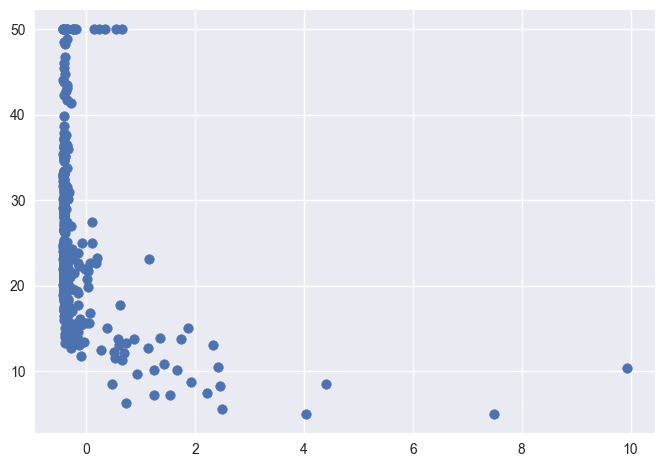

In [11]:
plt.style.use('seaborn')
plt.scatter(X[:, 1], Y)
plt.show()
     

In [12]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X[:4, :])

[[ 1.         -0.27259857 -0.41978194 -1.0755623   0.41367189]
 [ 1.         -0.27259857 -0.41733926 -0.49243937  0.19427445]
 [ 1.         -0.27259857 -0.41734159 -1.2087274   1.28271368]
 [ 1.         -0.27259857 -0.41675042 -1.36151682  1.01630251]]


In [13]:
def hypothesis(x, theta):
  y_ = 0
  n = x.shape[0]

  for i in range(n):
    y_ += theta[i]*x[i]

  return y_

In [14]:
def cost(X, Y, theta):
  m = X.shape[0]
  total_error = 0

  for i in range(m):
    y_p = hypothesis(X[i], theta)

    total_error += (y_p - Y[i])**2

  return total_error/m

In [15]:
def gradient(X, Y, theta):
  m, n = X.shape

  grad = np.zeros((n,))

  for j in range(n):
    for i in range(m):

      x = X[i]

      y_p = hypothesis(x, theta)

      y_t = Y[i]

      grad[j] += (y_p - y_t)*x[j]
    
  return grad/m

In [16]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 3000):

  m, n = X.shape
  theta = np.zeros((n, ))
  cost_epoch = []

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost(X, Y, theta)
    cost_epoch.append(e)

    for j in range(n):

      theta[j] = theta[j] - learning_rate*grad[j]

  return theta, cost_epoch

In [17]:
theta, cost_epoch = gradient_descent(X, Y, learning_rate=0.1, max_steps = 200)

In [18]:

theta

array([23.001524  ,  0.84420801, -0.87303319, -3.50895435,  4.38691061])

In [19]:
cost_epoch[-10:]

[28.944784143497955,
 28.944783834207353,
 28.944783542594976,
 28.944783267649996,
 28.944783008419293,
 28.944782764004337,
 28.944782533558072,
 28.94478231628188,
 28.944782111422835,
 28.94478191827106]

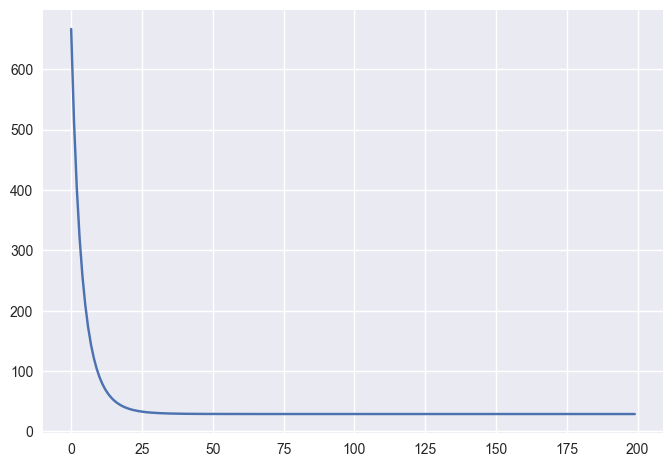

In [20]:
plt.plot(cost_epoch)
plt.show()

In [21]:
ones = np.ones((Xtest.shape[0], 1))
Xtest = np.hstack((ones, Xtest))
print(Xtest[:4, :4], Xtest.shape)
     

[[ 1.         -0.27259857  1.99029374  1.49802836]
 [ 1.         -0.27259857  0.97027072 -0.07331975]
 [ 1.         -0.27259857  0.4410972   1.92696014]
 [ 1.         -0.27259857  1.25971423  0.99900969]] (100, 5)


In [22]:
y_pred_test = []

for i in range(Xtest.shape[0]):
  pred = hypothesis(Xtest[i], theta)
  y_pred_test.append(pred)

y_pred_test = np.array(y_pred_test)

In [23]:
for i in range(len(y_pred_test)):
  print(y_pred_test[i], Ytest[i])

2.36114497430834 11.9
17.952727618615196 27.9
11.452071502118534 17.2
21.71209249878926 27.5
15.896444199593411 15.0
19.82446765655812 17.2
0.1918821506196302 17.9
9.514072346636272 16.3
-4.509659091093953 7.0
14.169625626358199 7.2
18.684672153815775 7.5
7.494534145306343 10.4
9.701314194385992 8.8
20.347976552141887 8.4
21.637622065256444 16.7
19.184940915738263 14.2
17.223885580696198 20.8
16.05510566615118 13.4
15.530856204143916 11.7
13.325273413169619 8.3
17.60282652232953 10.2
17.877427122355517 10.9
17.45601544724983 11.0
17.165238821830354 9.5
20.21887282057823 14.5
22.08220456284219 14.1
23.667545213124427 16.1
21.7630626679873 14.3
20.008007864318333 11.7
18.93479968132555 13.4
20.12110269853072 9.6
13.981397847869427 8.7
9.054079450550413 8.4
13.044080994441508 12.8
13.330262652018694 10.5
19.531487490414165 17.1
20.216189415847087 18.4
20.33015092715336 15.4
13.668583497055332 10.8
17.57274275031516 11.8
20.32527177282133 14.9
20.057312384127073 12.6
18.874100950726444 14.

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Ytest, y_pred_test))
print('MSE:', metrics.mean_squared_error(Ytest, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, y_pred_test)))

MAE: 4.565404587346546
MSE: 32.00118331388537
RMSE: 5.656958839684568
